In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor, VotingRegressor, ExtraTreesRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_log_error

In [2]:
train=pd.read_csv("Train.csv", parse_dates=["Travel Date"])
test=pd.read_csv("Test.csv", parse_dates=["Travel Date"])
train.shape, test.shape

((21000, 15), (9000, 14))

In [3]:
train.head()

,Uniq Id,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price
0,e788ab76d9d8cf1e6ed2f139645ca5d1,Best of Shimla and Manali Holiday from Delhi,Standard,New Delhi|Shimla|Manali|Chandigarh,1N New Delhi . 2N Shimla . 2N Manali . 1N Chan...,New Delhi|Shimla|Manali|Chandigarh,2021-07-30,Not Available,Mumbai,Not Available,2,3,Not Available,Not Available,11509.0
1,178f892630ce3e335a5a41d5d83937fd,Kashmir Valley vacation,Premium,Srinagar|Pahalgam|Srinagar,1N Srinagar . 2N Pahalgam . 1N Srinagar,Srinagar|Pahalgam|Srinagar,2021-08-12,The Orchard Retreat & Spa:4.6|WelcomHotel Pine...,New Delhi,IndiGo|IndiGo,0,5,Dal Lake | Avantipura Ruins | Mughal Gardens ...,Cancellation any time after making the 1st pay...,22485.5
2,f060f2954840503cc2fdaf495357b7df,Might of Mewar- Udaipur and Chittorgarh,Luxury,Udaipur|Chittorgarh,2N Udaipur . 1N Chittorgarh,Udaipur|Chittorgarh,2021-04-26,The Ananta:4.4|juSTa Lake Nahargarh Palace:4,New Delhi,IndiGo,0,4,Lake Pichola | Jag Mandir Palace | Saheliyon ...,Cancellation any time after making the 1st pay...,12421.5
3,32a19a6c171e67448f2346da46c619dc,Colorful Kerala ( Romantic Getaway ),Premium,Munnar|Kumarakom|Allepey|Kovalam and Poovar,2N Munnar . 1N Kumarakom . 1N Allepey . 2N Kov...,Munnar|Kumarakom|Allepey|Kovalam and Poovar,2021-08-27,Elixir Hills Suites Resort & Spa-MMT Holidays ...,New Delhi,IndiGo,0,5,Mattupetty Dam | Echo Point | Tata Tea Museum...,Cancellation any time after making the 1st pay...,35967.0
4,107b068aa0ca03bc6248966f594d105f,A Week In Bangkok & Pattaya,Premium,Pattaya|Bangkok,4N Pattaya . 3N Bangkok,Pattaya|Bangkok,2021-12-12,Dusit Thani Pattaya - MMT Special:4.5|Amari Wa...,New Delhi,Spicejet|Go Air,0,5,"Coral Island Tour with Indian Lunch, Join Spe...",Cancellation any time after making the 1st pay...,25584.0


In [4]:
test.head()

,Uniq Id,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules
0,12c47aefbcca65d6156ba0bc7946704b,Goa 5N stay with flights & Transfers-North Goa,Luxury,Goa,5N Goa,Goa,2021-07-13,Novotel Goa Resort & Spa:4.1,New Delhi,IndiGo,0,4,Not Available,Cancellation any time after making the 1st pay...
1,156febf7d27315ae9f210ed13bca3ac2,Into the Wild - Weekend at Bandipur National Park,Luxury,Bandipur,2N Bandipur,Bandipur,2021-03-20,The Windflower Jungle Resorts & Spa Bandipur:4.4,New Delhi,Not Available,0,4,Bandipur National Park,This cancellation policy is applicable for boo...
2,a7f43314e3ee6464a4e35b874bddf2ea,Unforgettable Munnar Getaway - Private Picnic ...,Standard,Munnar,3N Munnar,Munnar,2022-09-02,Not Available,New Delhi,Not Available,2,3,Old Munnar Town | Eravikulam national park | ...,This cancellation policy is applicable for boo...
3,d9cc4b407f3d5d290560c03d9ac71035,Munnar for Adventure Lovers - Top Valley Trek,Deluxe,Munnar,3N Munnar,Munnar,2021-05-16,Not Available,Mumbai,Not Available,1,3,Tata Tea Museum | Eravikulam national park | ...,This cancellation policy is applicable for boo...
4,b3bbc8aa6429feb260e9ac0a91f252c4,Splendours of Kerala - Make your own Tea,Luxury,Cochin|Munnar|Thekkady|Allepey,1N Cochin . 2N Munnar . 1N Thekkady . 1N Allepey,Cochin|Munnar|Thekkady|Allepey,2021-10-13,Casino Hotel - Cgh Earth-MMT Holidays Special:...,New Delhi,IndiGo,0,4,Fort Cochin | Dutch Palace | Jewish Synagogue...,Cancellation any time after making the 1st pay...


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Uniq Id                     21000 non-null  object        
 1   Package Name                21000 non-null  object        
 2   Package Type                21000 non-null  object        
 3   Destination                 21000 non-null  object        
 4   Itinerary                   21000 non-null  object        
 5   Places Covered              21000 non-null  object        
 6   Travel Date                 21000 non-null  datetime64[ns]
 7   Hotel Details               21000 non-null  object        
 8   Start City                  21000 non-null  object        
 9   Airline                     21000 non-null  object        
 10  Flight Stops                21000 non-null  int64         
 11  Meals                       21000 non-null  int64     

In [6]:
train.describe()

,Flight Stops,Meals,Per Person Price
count,21000.000000,21000.000000,21000.000000
mean,0.870286,3.665429,20059.330381
std,0.834989,0.893631,11643.641766
min,0.000000,2.000000,791.000000
25%,0.000000,3.000000,12461.000000
50%,1.000000,3.000000,17765.500000
75%,2.000000,5.000000,25081.375000
max,2.000000,5.000000,171062.500000


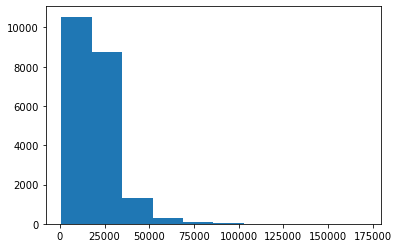

In [7]:
plt.hist(train["Per Person Price"]);

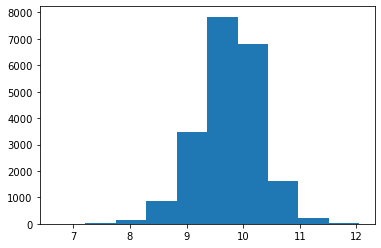

In [8]:
plt.hist(np.log(train["Per Person Price"]));

In [9]:
train["Per Person Price"]=np.log(train["Per Person Price"])

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Uniq Id                     9000 non-null   object        
 1   Package Name                9000 non-null   object        
 2   Package Type                9000 non-null   object        
 3   Destination                 9000 non-null   object        
 4   Itinerary                   9000 non-null   object        
 5   Places Covered              9000 non-null   object        
 6   Travel Date                 9000 non-null   datetime64[ns]
 7   Hotel Details               9000 non-null   object        
 8   Start City                  9000 non-null   object        
 9   Airline                     9000 non-null   object        
 10  Flight Stops                9000 non-null   int64         
 11  Meals                       9000 non-null   int64       

In [11]:
id=test["Uniq Id"]

In [12]:
data=pd.concat((train, test), axis=0)
data.shape

(30000, 15)

In [13]:
data["Package Name"].value_counts()

Bali Special 4 Nights                                           53
Holiday in Manali & Chandigarh from Chandigarh                  52
Getaway to the Hills of Kodaikanal from Madurai                 46
MMT Value Deal - Bali (6N)                                      44
Amazing Kerala                                                  44
                                                                ..
Weekend Getaway to Jims Jungle Retreat in Corbett                1
Jaisalmer - Unique Stay                                          1
Weekend Trip to Patlidun Safari Lodge, Corbett from Delhi        1
Luxury Hill Escape - Ooty Getaway with Stay at the Taj Savoy     1
Udaipur with Mount Abu - Unique Retreat                          1
Name: Package Name, Length: 2236, dtype: int64

In [14]:
data["Destination"].value_counts()

Goa                                      1364
Shimla|Manali|Chandigarh                  480
Munnar|Thekkady|Allepey                   465
Port Blair|Havelock|Port Blair            409
Srinagar|Gulmarg|Pahalgam|Srinagar        393
                                         ... 
Copenhagen|Oslo                             2
Singapore|Melbourne|Gold Coast|Sydney       2
Nuwara Eliya|Bentota|Colombo                1
Singapore|Singapore Cruise                  1
Agra|Gwalior|Orchha|Khajuraho               1
Name: Destination, Length: 566, dtype: int64

In [15]:
data["Places Covered"].value_counts()

Goa                                      1364
Shimla|Manali|Chandigarh                  480
Munnar|Thekkady|Allepey                   465
Port Blair|Havelock|Port Blair            409
Srinagar|Gulmarg|Pahalgam|Srinagar        393
                                         ... 
Singapore|Melbourne|Gold Coast|Sydney       2
30-01-2021                                  1
Singapore|Singapore Cruise                  1
Agra|Gwalior|Orchha|Khajuraho               1
Nuwara Eliya|Bentota|Colombo                1
Name: Places Covered, Length: 567, dtype: int64

In [16]:
data["Package Type"].value_counts()

Deluxe      8499
Standard    8171
Premium     7960
Luxury      4688
Budget       682
Name: Package Type, dtype: int64

In [17]:
data["Hotel Details"].value_counts()

Not Available                                                                                                                                                                             4167
Novotel Goa Resort & Spa:4.1                                                                                                                                                               175
AMARA GRAND BAGA, GOA- MMT Holidays Special:                                                                                                                                               151
Little Mastiff Dharamshala - Unit Of Pong View Hotel:3.9                                                                                                                                   115
Novotel Goa Resort & Spa:4.2                                                                                                                                                               111
                                             

In [18]:
data["Airline"].value_counts()

Not Available                            7010
IndiGo                                   5292
Spicejet                                 4378
Go Air                                   3033
IndiGo|IndiGo                            1584
                                         ... 
Vistara|Vistara|Spicejet|Spicejet           1
Malindo Air|Malindo Air|Go Air              1
Vistara|Scoot|Spicejet                      1
Spicejet|Spicejet|Vistara|Vistara           1
AirAsia X|AirAsia X|AirAsia|AirAsia X       1
Name: Airline, Length: 363, dtype: int64

In [19]:
data["Start City"].value_counts()

New Delhi    19664
Mumbai       10336
Name: Start City, dtype: int64

In [20]:
len(data["Cancellation Rules"].value_counts())

10

In [21]:
data.drop(["Uniq Id","Places Covered"], axis=1, inplace=True)

In [22]:
data=pd.get_dummies(data, columns=["Package Type","Start City"], drop_first=True)
data.head()

,Package Name,Destination,Itinerary,Travel Date,Hotel Details,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price,Package Type_Deluxe,Package Type_Luxury,Package Type_Premium,Package Type_Standard,Start City_New Delhi
0,Best of Shimla and Manali Holiday from Delhi,New Delhi|Shimla|Manali|Chandigarh,1N New Delhi . 2N Shimla . 2N Manali . 1N Chan...,2021-07-30,Not Available,Not Available,2,3,Not Available,Not Available,9.350885,0,0,0,1,0
1,Kashmir Valley vacation,Srinagar|Pahalgam|Srinagar,1N Srinagar . 2N Pahalgam . 1N Srinagar,2021-08-12,The Orchard Retreat & Spa:4.6|WelcomHotel Pine...,IndiGo|IndiGo,0,5,Dal Lake | Avantipura Ruins | Mughal Gardens ...,Cancellation any time after making the 1st pay...,10.020626,0,0,1,0,1
2,Might of Mewar- Udaipur and Chittorgarh,Udaipur|Chittorgarh,2N Udaipur . 1N Chittorgarh,2021-04-26,The Ananta:4.4|juSTa Lake Nahargarh Palace:4,IndiGo,0,4,Lake Pichola | Jag Mandir Palace | Saheliyon ...,Cancellation any time after making the 1st pay...,9.427184,0,1,0,0,1
3,Colorful Kerala ( Romantic Getaway ),Munnar|Kumarakom|Allepey|Kovalam and Poovar,2N Munnar . 1N Kumarakom . 1N Allepey . 2N Kov...,2021-08-27,Elixir Hills Suites Resort & Spa-MMT Holidays ...,IndiGo,0,5,Mattupetty Dam | Echo Point | Tata Tea Museum...,Cancellation any time after making the 1st pay...,10.490357,0,0,1,0,1
4,A Week In Bangkok & Pattaya,Pattaya|Bangkok,4N Pattaya . 3N Bangkok,2021-12-12,Dusit Thani Pattaya - MMT Special:4.5|Amari Wa...,Spicejet|Go Air,0,5,"Coral Island Tour with Indian Lunch, Join Spe...",Cancellation any time after making the 1st pay...,10.149722,0,0,1,0,1


In [23]:
data["dest_count"]=data["Destination"].apply(lambda x: len(x.split("|")))
data["hotel_counts"]=data["Hotel Details"].apply(lambda x: len(x.split("|")))
data["itinery_counts"]=data["Itinerary"].apply(lambda x: len(x.split(". ")))
data["stays"]=data["Itinerary"].apply(lambda x:sum([int(i[0]) for i in x.split(". ")]))
data["airline_counts"]=data["Airline"].apply(lambda x: len(x.split("|")))
data["sights_covered"]=data["Sightseeing Places Covered"].apply(lambda x: len(x.split("|")))
data.head()

,Package Name,Destination,Itinerary,Travel Date,Hotel Details,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,...,Package Type_Luxury,Package Type_Premium,Package Type_Standard,Start City_New Delhi,dest_count,hotel_counts,itinery_counts,stays,airline_counts,sights_covered
0,Best of Shimla and Manali Holiday from Delhi,New Delhi|Shimla|Manali|Chandigarh,1N New Delhi . 2N Shimla . 2N Manali . 1N Chan...,2021-07-30,Not Available,Not Available,2,3,Not Available,Not Available,...,0,0,1,0,4,1,4,6,1,1
1,Kashmir Valley vacation,Srinagar|Pahalgam|Srinagar,1N Srinagar . 2N Pahalgam . 1N Srinagar,2021-08-12,The Orchard Retreat & Spa:4.6|WelcomHotel Pine...,IndiGo|IndiGo,0,5,Dal Lake | Avantipura Ruins | Mughal Gardens ...,Cancellation any time after making the 1st pay...,...,0,1,0,1,3,3,3,4,2,7
2,Might of Mewar- Udaipur and Chittorgarh,Udaipur|Chittorgarh,2N Udaipur . 1N Chittorgarh,2021-04-26,The Ananta:4.4|juSTa Lake Nahargarh Palace:4,IndiGo,0,4,Lake Pichola | Jag Mandir Palace | Saheliyon ...,Cancellation any time after making the 1st pay...,...,1,0,0,1,2,2,2,3,1,8
3,Colorful Kerala ( Romantic Getaway ),Munnar|Kumarakom|Allepey|Kovalam and Poovar,2N Munnar . 1N Kumarakom . 1N Allepey . 2N Kov...,2021-08-27,Elixir Hills Suites Resort & Spa-MMT Holidays ...,IndiGo,0,5,Mattupetty Dam | Echo Point | Tata Tea Museum...,Cancellation any time after making the 1st pay...,...,0,1,0,1,4,4,4,6,1,9
4,A Week In Bangkok & Pattaya,Pattaya|Bangkok,4N Pattaya . 3N Bangkok,2021-12-12,Dusit Thani Pattaya - MMT Special:4.5|Amari Wa...,Spicejet|Go Air,0,5,"Coral Island Tour with Indian Lunch, Join Spe...",Cancellation any time after making the 1st pay...,...,0,1,0,1,2,2,2,7,2,2


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 8999
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Package Name                30000 non-null  object        
 1   Destination                 30000 non-null  object        
 2   Itinerary                   30000 non-null  object        
 3   Travel Date                 30000 non-null  datetime64[ns]
 4   Hotel Details               30000 non-null  object        
 5   Airline                     30000 non-null  object        
 6   Flight Stops                30000 non-null  int64         
 7   Meals                       30000 non-null  int64         
 8   Sightseeing Places Covered  30000 non-null  object        
 9   Cancellation Rules          30000 non-null  object        
 10  Per Person Price            21000 non-null  float64       
 11  Package Type_Deluxe         30000 non-null  uint8      

In [25]:
encoder=LabelEncoder()
col=["Package Name","Destination","Itinerary","Hotel Details","Airline","Sightseeing Places Covered","Cancellation Rules"]
for i in col:
    data[i]=encoder.fit_transform(data[i])
    
data.head()

,Package Name,Destination,Itinerary,Travel Date,Hotel Details,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,...,Package Type_Luxury,Package Type_Premium,Package Type_Standard,Start City_New Delhi,dest_count,hotel_counts,itinery_counts,stays,airline_counts,sights_covered
0,422,418,214,2021-07-30,3804,250,2,3,1796,5,...,0,0,1,0,4,1,4,6,1,1
1,1152,534,283,2021-08-12,6527,145,0,5,575,0,...,0,1,0,1,3,3,3,4,2,7
2,1437,550,701,2021-04-26,6086,130,0,4,1058,0,...,1,0,0,1,2,2,2,3,1,8
3,487,329,528,2021-08-27,1027,130,0,5,1158,0,...,0,1,0,1,4,4,4,6,1,9
4,196,444,923,2021-12-12,974,279,0,5,350,0,...,0,1,0,1,2,2,2,7,2,2


In [26]:
data["day"]=data["Travel Date"].dt.day
data["month"]=data["Travel Date"].dt.month
data["week"]=data["Travel Date"].dt.week
data["week_day"]=data["Travel Date"].dt.dayofweek
#data["quar"]=data["Travel Date"].dt.quarter
#data["weekend"]=np.where(data["week_day"]>4,1,0)
#data["monthend"]=np.where(data["day"]>27,1,0)
data.drop("Travel Date", axis=1, inplace=True)
data.head()

,Package Name,Destination,Itinerary,Hotel Details,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price,...,dest_count,hotel_counts,itinery_counts,stays,airline_counts,sights_covered,day,month,week,week_day
0,422,418,214,3804,250,2,3,1796,5,9.350885,...,4,1,4,6,1,1,30,7,30,4
1,1152,534,283,6527,145,0,5,575,0,10.020626,...,3,3,3,4,2,7,12,8,32,3
2,1437,550,701,6086,130,0,4,1058,0,9.427184,...,2,2,2,3,1,8,26,4,17,0
3,487,329,528,1027,130,0,5,1158,0,10.490357,...,4,4,4,6,1,9,27,8,34,4
4,196,444,923,974,279,0,5,350,0,10.149722,...,2,2,2,7,2,2,12,12,49,6


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 8999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Package Name                30000 non-null  int32  
 1   Destination                 30000 non-null  int32  
 2   Itinerary                   30000 non-null  int32  
 3   Hotel Details               30000 non-null  int32  
 4   Airline                     30000 non-null  int32  
 5   Flight Stops                30000 non-null  int64  
 6   Meals                       30000 non-null  int64  
 7   Sightseeing Places Covered  30000 non-null  int32  
 8   Cancellation Rules          30000 non-null  int32  
 9   Per Person Price            21000 non-null  float64
 10  Package Type_Deluxe         30000 non-null  uint8  
 11  Package Type_Luxury         30000 non-null  uint8  
 12  Package Type_Premium        30000 non-null  uint8  
 13  Package Type_Standard       3000

In [28]:
train=data[~data["Per Person Price"].isnull()]
test=data[data["Per Person Price"].isnull()].drop("Per Person Price", axis=1)

In [29]:
x=train.drop("Per Person Price", axis=1)
y=train[["Per Person Price"]]

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [31]:
X = x.iloc[:,:]
calc_vif(X)

,variables,VIF
0,Package Name,1.055714
1,Destination,1.407748
2,Itinerary,2.853284
3,Hotel Details,1.021132
4,Airline,1.047253
5,Flight Stops,inf
6,Meals,inf
7,Sightseeing Places Covered,1.069865
8,Cancellation Rules,1.304611
9,Package Type_Deluxe,inf


In [32]:
drop_col=["Package Name","Package Type_Premium","itinery_counts","Flight Stops","Package Type_Deluxe","week","month","week_day"
       ,"Package Type_Luxury","day","hotel_counts","sights_covered","dest_count"]
x.drop(drop_col, axis=1, inplace=True)
test.drop(drop_col, axis=1, inplace=True)

In [33]:
X = x.iloc[:,:]
calc_vif(X)

,variables,VIF
0,Destination,4.883763
1,Itinerary,5.086567
2,Hotel Details,4.292919
3,Airline,6.025602
4,Meals,13.077310
5,Sightseeing Places Covered,4.776231
6,Cancellation Rules,1.414157
7,Package Type_Standard,1.496249
8,Start City_New Delhi,2.753506
9,stays,8.530769


In [34]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.33, random_state=45)

In [35]:
def test_accuracy(models):
    for i in models:
        i.fit(x_train,y_train)
        pred=i.predict(x_test)
        print("{}:{}".format(i,np.sqrt(mean_squared_log_error(np.exp(y_test), np.exp(pred)))))

In [36]:
rf=RandomForestRegressor(n_jobs=-1)
grad=GradientBoostingRegressor()
xgb=XGBRegressor()
lgb=LGBMRegressor()
cat=CatBoostRegressor(verbose=200)

In [37]:
models=[xgb, rf, lgb, grad,cat]
test_accuracy(models)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None):0.1922531999242766
RandomForestRegressor(n_jobs=-1):0.20409085530087986
LGBMRegressor():0.21567407987079817
GradientBoostingRegressor():0.258839010291213
Learning rate set to 0.062488
0:	learn: 0.5237197	total: 248ms	remaining: 4m 7s
200:	learn: 0.2298325	total: 1.02s	remaining: 4.05s
400:	learn: 0.2058954	total: 1.78s	remaining: 2.67s
600:	learn: 0.1912949	total: 2.56s	remaining: 1.7s
800:	learn: 0.1811450	total: 3.38s	r

In [41]:
cat = CatBoostRegressor(depth=6, n_estimators=1769, learning_rate=0.04)
cat.fit(x_train,y_train,eval_set=[(x_test, y_test)], early_stopping_rounds=100,verbose=200)

0:	learn: 0.5308995	test: 0.5276077	best: 0.5276077 (0)	total: 6.47ms	remaining: 11.4s
200:	learn: 0.2460341	test: 0.2553604	best: 0.2553604 (200)	total: 755ms	remaining: 5.89s
400:	learn: 0.2208372	test: 0.2339884	best: 0.2339884 (400)	total: 1.53s	remaining: 5.21s
600:	learn: 0.2070364	test: 0.2240132	best: 0.2240132 (600)	total: 2.3s	remaining: 4.48s
800:	learn: 0.1968227	test: 0.2172397	best: 0.2172397 (800)	total: 3.07s	remaining: 3.71s
1000:	learn: 0.1893109	test: 0.2126261	best: 0.2126261 (1000)	total: 3.91s	remaining: 3s
1200:	learn: 0.1825299	test: 0.2084883	best: 0.2084883 (1200)	total: 4.73s	remaining: 2.23s
1400:	learn: 0.1768318	test: 0.2053131	best: 0.2053131 (1400)	total: 5.53s	remaining: 1.45s
1600:	learn: 0.1722924	test: 0.2028334	best: 0.2028334 (1600)	total: 6.34s	remaining: 666ms
1768:	learn: 0.1690636	test: 0.2012153	best: 0.2012152 (1767)	total: 7.02s	remaining: 0us

bestTest = 0.2012152199
bestIteration = 1767

Shrink model to first 1768 iterations.


In [42]:
ypred_cat = pd.Series(cat.predict(x_test))
np.sqrt(mean_squared_log_error(np.exp(y_test),np.exp(ypred_cat)))

0.20120053813905528

In [43]:
xgb = XGBRegressor(max_depth=6, n_estimators=1800, learning_rate=0.07, min_child_weight= 4)
xgb.fit(x_train,y_train,eval_set=[(x_train,y_train),(x_test,y_test)],verbose=200, early_stopping_rounds=100)

[0]	validation_0-rmse:8.63371	validation_1-rmse:8.62478
[200]	validation_0-rmse:0.17995	validation_1-rmse:0.20702
[400]	validation_0-rmse:0.14941	validation_1-rmse:0.19209
[600]	validation_0-rmse:0.13391	validation_1-rmse:0.18685
[800]	validation_0-rmse:0.12391	validation_1-rmse:0.18438
[1000]	validation_0-rmse:0.11672	validation_1-rmse:0.18306
[1200]	validation_0-rmse:0.11074	validation_1-rmse:0.18220
[1400]	validation_0-rmse:0.10581	validation_1-rmse:0.18188
[1553]	validation_0-rmse:0.10270	validation_1-rmse:0.18179


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.07, max_delta_step=0, max_depth=6,
             min_child_weight=4, missing=nan, monotone_constraints='()',
             n_estimators=1800, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [44]:
ypred_xgb = xgb.predict(x_test)
np.sqrt(mean_squared_log_error(np.exp(y_test),np.exp(ypred_xgb)))

0.1817423250935322

In [45]:
rf=RandomForestRegressor(max_depth=21)
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=21)

In [46]:
ypred_rf = rf.predict(x_test)
np.sqrt(mean_squared_log_error(np.exp(y_test),np.exp(ypred_rf)))

0.2045174228059016

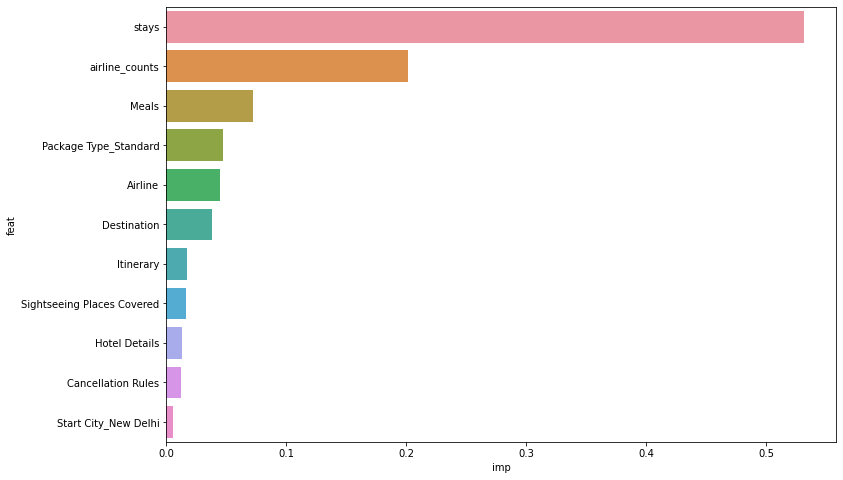

In [47]:
plt.figure(figsize=(12,8))
a=zip(x.columns,xgb.feature_importances_)
feat_imp=pd.DataFrame(a)
feat_imp.columns=["feat","imp"]
feat_imp=feat_imp.sort_values(by="imp", ascending=False)
sns.barplot(data=feat_imp, x="imp", y="feat");

In [48]:
xgb.fit(x,y)
p2=np.exp(xgb.predict(test))

In [49]:
prediction=(p2)

In [50]:
pred=pd.DataFrame(prediction,columns=["Per Person Price"])
pred.head()

,Per Person Price
0,18688.414062
1,12322.120117
2,5176.239258
3,7123.183105
4,21187.392578


In [51]:
pred.to_csv("submission.csv", index=False)